In [59]:
%%file jupyter_utils.py
import json
import os.path
import re
import ipykernel
import requests


from requests.compat import urljoin

from notebook.notebookapp import list_running_servers

def get_notebook_name():
    """
    Return the full path of the jupyter notebook.
    """
    kernel_id = re.search('kernel-(.*).json',
                          ipykernel.connect.get_connection_file()).group(1)
    servers = list_running_servers()
    for ss in servers:
        response = requests.get(urljoin(ss['url'], 'api/sessions'),
                                params={'token': ss.get('token', '')})
        for nn in json.loads(response.text):
            if nn['kernel']['id'] == kernel_id:
                relative_path = nn['notebook']['path']
                return os.path.join(ss['notebook_dir'], relative_path)

Writing jupyter_utils.py


In [66]:
%%file common.py
import os


import jupyter_utils



FIGURE_FOLDER = os.path.join('..', 'figures')

def get_notebook_basename():
    notebook_path = jupyter_utils.get_notebook_name()
    notebook_basename = os.path.basename(notebook_path).split('.ipynb')[0]
    return notebook_basename


def get_figure_folder():
    notebook_basename = get_notebook_basename()
    figure_folder = os.path.join(FIGURE_FOLDER, notebook_basename)
    return figure_folder

Overwriting common.py


In [67]:
import common

In [72]:
figure_folder = common.get_figure_folder()
! mkdir -p $figure_folder
figure_folder


'../figures/076_get_num_hashes_for_1000cell_scaled=100'

In [1]:
%load_ext autoreload
%autoreload 2

import glob
import os

import pandas as pd
import numpy as np
from tqdm import tqdm


import sourmash_utils

In [6]:
folder = '/home/olga/scratch/maca/facs/sourmash_dna-only_trim=false_scaled=100'
! ls -l $folder | head

total 56315452
-rwxr-xr-x 1 olga olga  52535023 Aug  1 19:08 A10-B003281-3_39_F-1-1.signature
-rwxr-xr-x 1 olga olga  66727477 Aug  7 22:16 A10-MAA000496-3_10_M-1-1.signature
-rwxr-xr-x 1 olga olga  93244878 Aug  2 20:19 A10-MAA000605-3_10_M-1-1.signature
-rwxr-xr-x 1 olga olga  25735293 Aug  7 18:40 A11-MAA000611-3_8_M-1-1.signature
-rwxr-xr-x 1 olga olga  33580028 Aug  2 22:43 A12-B001689-3_38_F-1-1.signature
-rwxr-xr-x 1 olga olga  16490093 Aug  1 12:18 A12-B003290-3_38_F-1-1.signature
-rwxr-xr-x 1 olga olga  36779365 Aug  3 09:54 A12-MAA000388-3_11_M-1-1.signature
-rwxr-xr-x 1 olga olga  74498621 Aug  3 10:33 A12-MAA000439-3_10_M-1-1.signature
-rwxr-xr-x 1 olga olga  32144761 Aug  1 15:38 A12-MAA000597-3_9_M-1-1.signature
ls: write error: Broken pipe


In [3]:
sourmash_utils.describe(f'{folder}/A10-B003281-3_39_F-1-1.signature')

/home/olga/code/kmer-hashing/notebooks/sourmash_utils.py:54: RuntimeWarning: divide by zero encountered in log10
  description['log10_n_mins'] = np.log10(description.n_mins)


,ksize,molecule,n_mins,name,log10_n_mins
0,3,DNA,0,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,-inf
1,6,DNA,24,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,1.380211
2,9,DNA,1362,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,3.134177
3,12,DNA,45727,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,4.660173
4,15,DNA,102642,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,5.011325
5,18,DNA,122117,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,5.086776
6,21,DNA,134256,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,5.127934
7,24,DNA,144378,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,5.159501
8,27,DNA,153218,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,5.185310
9,30,DNA,159089,A10-B003281-3_39_F-1-1|tissue:Brain_Myeloid|su...,5.201640


In [4]:
%time dfs = [sourmash_utils.describe(sig) for sig in tqdm(glob.iglob(f'{folder}/*.signature'))]
print(len(dfs))

0it [00:00, ?it/s]/home/olga/code/kmer-hashing/notebooks/sourmash_utils.py:54: RuntimeWarning: divide by zero encountered in log10
  description['log10_n_mins'] = np.log10(description.n_mins)
996it [28:49,  3.00s/it]

CPU times: user 12min 17s, sys: 1min 6s, total: 13min 24s
Wall time: 28min 49s
996


In [8]:
import seaborn as sns
%matplotlib inline

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


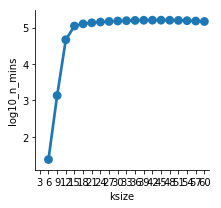

In [10]:
g = sns.FacetGrid(descriptions_all, palette='magma')
g.map(sns.pointplot, 'ksize', 'log10_n_mins')
g.add_legend()

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


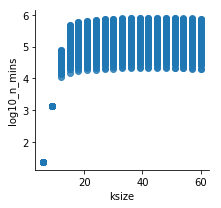

In [14]:
g = sns.FacetGrid(descriptions_all, palette='magma')
g.map(sns.regplot, 'ksize', 'log10_n_mins')
g.add_legend()

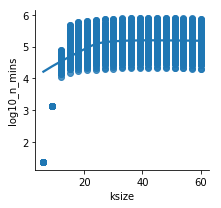

In [19]:
g = sns.FacetGrid(descriptions_all, palette='magma')
g.map(sns.regplot, 'ksize', 'log10_n_mins', lowess=True)
g.add_legend()

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


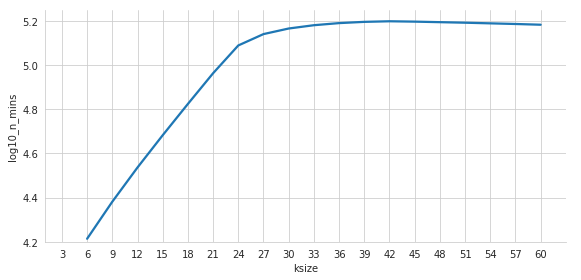

In [33]:
xticks = sorted(descriptions_all.ksize.unique())
sns.set_style('whitegrid')
g = sns.FacetGrid(descriptions_all, palette='magma', size=4, aspect=2)
g.map(sns.regplot, 'ksize', 'log10_n_mins', lowess=True, scatter=False)
g.set(ylim=(4.2, 5.25), xlim=(1, 63), xticks=xticks)
g.add_legend()

In [39]:
10**5.2

158489.3192461114

In [40]:
import matplotlib.pyplot as plt

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


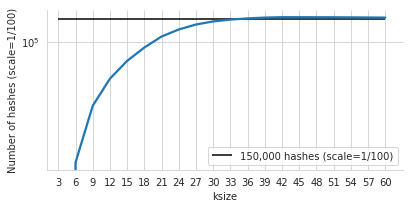

In [76]:
xticks = sorted(descriptions_all.ksize.unique())
sns.set_style('whitegrid')
g = sns.FacetGrid(descriptions_all, palette='magma', size=3, aspect=2)
g.map(sns.regplot, 'ksize', 'n_mins', lowess=True, scatter=False,)
g.set(xlim=(1, 63), xticks=xticks, yscale='log', ylabel='Number of hashes (scale=1/100)')
for ax in g.axes.flat:
    ax.hlines(150000, 3, 60, label='150,000 hashes (scale=1/100)')
    ax.legend(loc='lower right')
g.add_legend()
g.savefig(os.path.join(figure_folder, 'num_hashes_per_ksize.pdf'))

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


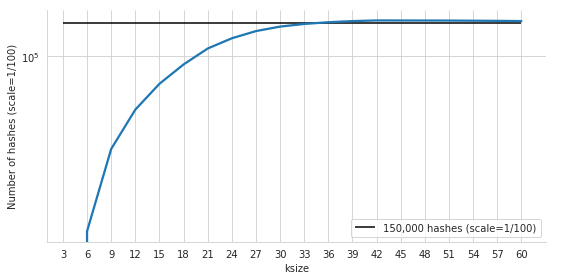

In [75]:
xticks = sorted(descriptions_all.ksize.unique())
sns.set_style('whitegrid')
g = sns.FacetGrid(descriptions_all, palette='magma', size=4, aspect=2)
g.map(sns.regplot, 'ksize', 'n_mins', lowess=True, scatter=False,)
g.set(xlim=(1, 63), xticks=xticks, yscale='log', ylabel='Number of hashes (scale=1/100)')
for ax in g.axes.flat:
    ax.hlines(150000, 3, 60, label='150,000 hashes (scale=1/100)')
    ax.legend(loc='lower right')
g.add_legend()
# g.savefig(os.path.join(figure_folder, 'num_hashes_per_ksize.pdf'))

In [54]:
import s3_utils


fmt = 'parquet'
filename = f's3://olgabot-maca/facs/sourmash_compute_trim=false_scaled=100_descriptions.{fmt}'

%time s3_utils.write_s3(descriptions_all, filename, fmt=fmt)

CPU times: user 48 ms, sys: 8 ms, total: 56 ms
Wall time: 377 ms


In [55]:
! aws s3 ls $filename

2018-11-01 06:49:53     309146 sourmash_compute_trim=false_scaled=100_descriptions.parquet
